In [106]:
import os
import sys
import json
import pandas as pd
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
TOP_PATH = os.environ['PWD']

In [4]:
sys.path.append(TOP_PATH + '/config')
sys.path.append(TOP_PATH + '/src')

In [107]:
from trends import *
import etl
from regression import get_data_from_range
import eda_viz

In [7]:
df_2017_raw = pd.read_csv(TOP_PATH + '/data/raw/STOPS_2017.csv')

In [15]:
df_2017_raw.head()

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
0,1444799,Moving Violation,120,I,M,37,2017-01-01,00:03:00,N,N,NaN,NaN,NaN
1,1444821,Equipment Violation,520,W,M,22,2017-01-01,00:25:00,N,N,NaN,NaN,NaN
2,1447102,Moving Violation,520,W,M,29,2017-01-01,01:45:00,N,N,NaN,NaN,NaN
3,1444801,Equipment Violation,720,H,F,61,2017-01-01,03:10:00,N,N,NaN,NaN,NaN
4,1444802,Equipment Violation,120,H,M,24,2017-01-01,03:30:00,N,N,NaN,NaN,NaN


In [16]:
df_2017_cleaned = pd.read_csv(TOP_PATH + '/data/cleaned/2017_cleaned.csv')

# Make the dataframe that we'd be using to look at DACA

In [25]:
df_daca_window = get_data_from_range(('07-05-2017', '11-05-2017'))

In [26]:
df_daca_window.head()

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
56076,1500296,Equipment Violation,720,Black/African American,Male,30.0,2017-07-05,00:10:00,N,N,NaN,N,N
56077,1500297,Moving Violation,240,Other,Male,33.0,2017-07-05,00:19:00,N,N,NaN,N,N
56078,1500346,Equipment Violation,430,White,Male,31.0,2017-07-05,00:40:00,N,N,NaN,N,N
56079,1500347,Equipment Violation,820,Black/African American,Male,47.0,2017-07-05,00:49:00,Y,N,NaN,N,N
56080,1500299,Moving Violation,930,White,Female,40.0,2017-07-05,00:57:00,N,N,NaN,N,N


In [57]:
df_daca_used_columns = df_daca_window[['stop_id', 'service_area', 'subject_race', 'date_stop']]

In [58]:
df_daca_used_columns['month'] = df_daca_used_columns['date_stop'].str.slice(5,7)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
month_dictionary = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

In [60]:
df_daca_used_columns = df_daca_used_columns.astype({'month' : int})

In [61]:
month_distribution_df = (df_daca_used_columns[['month', 'stop_id']].groupby('month').count() / len(df_daca_used_columns)).rename({'stop_id' : 'stop_percentage'}, axis = 1)

In [62]:
month_distribution_df = month_distribution_df.sort_values('month')

In [64]:
month_distribution_df.index = month_distribution_df.index.map(month_dictionary)

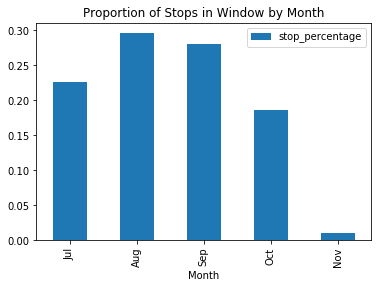

In [71]:
ax = month_distribution_df.plot(kind = 'bar')
ax.set(title = 'Proportion of Stops in Window by Month',
           xlabel = 'Month')
fig = ax.figure

In [99]:
fig?

In [94]:
temp2 = df_daca_used_columns.pivot_table(values = 'stop_id', index = 'month', columns = 'subject_race', aggfunc = 'count')

In [101]:
temp2.index = temp2.index.map(month_dictionary)

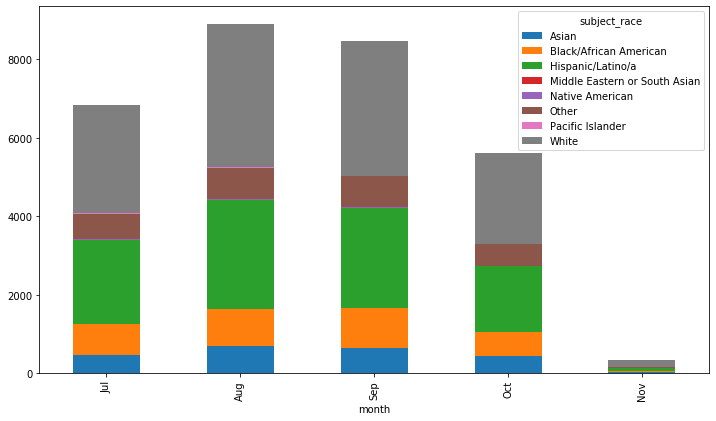

In [102]:
ax2 = (temp2.plot.bar(stacked = True, figsize = [12, 6.75]))

In [103]:
fig = ax2.figure

In [105]:
fig.savefig()

TypeError: savefig() missing 1 required positional argument: 'fname'

In [ ]:
eda_viz.month_race_count_viz(('07-05-2017', '11-05-2017'), 'DACA', save_fig = True)